In [1]:
import numpy as np
from skimage import io
from skimage.feature import graycomatrix, graycoprops
import math
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
happy = ['0105', '0107', '0110']
neutral = ['0101', '0106', '0109']
sad = ['0106', '0107', '0110']

selected = {
    'happy': happy,
    'neutral': neutral,
    'sad': sad
}

In [3]:
def create_pixel_matrix(emotion: str, number_images: list) -> list:
        return io.imread(f'datasets/{emotion}/{emotion}-{number_images}.jpg', as_gray = True)

In [4]:
def show_histogram(title: str, image_pixel: list):
        plt.subplot(1, 2, 1)
        plt.imshow(image_pixel, cmap = 'gray')
        plt.title(title)

        plt.subplot(1, 2, 2)
        plt.hist(image_pixel.ravel(), 256, [0, 255])
        plt.title(f'{title} histogram')

        plt.show()

In [5]:
def first_order_statistics(image_pixel: list) -> tuple:
    hist, _ = np.histogram(image_pixel, 256, [0, 255])

    # mean
    # print(np.mean(image_pixel))
    hist_sum = sum(hist)
    hist_per_sum = []
    mean = 0
    for h in hist:
        hist_per_sum.append(h / hist_sum)
    for i in range(256):
        mean += hist_per_sum[i] * i

    # print(mean)

    # variance
    # print(np.var(image_pixel))
    variance = 0
    for i in range(256):
        variance += (i - mean) ** 2 * hist_per_sum[i]
    # print(variance)

    # skewness
    skewness = 0
    for i in range(256):
        skewness += (i - mean) ** 3 * hist_per_sum[i]
    skewness = skewness / (variance * math.sqrt(variance))
    # print(skewness)

    # kurtosis
    kurtosis = 0
    for i in range(256):
        kurtosis += (i - mean) ** 4 * hist_per_sum[i]
    kurtosis = kurtosis / (variance ** 2) - 3
    # print(kurtosis)

    # entropy
    entropy = 0
    for i in range(246):
        entropy += hist_per_sum[i] * math.log2(np.spacing(hist_per_sum[i]))
    entropy = -entropy
    # print(entropy)

    return (mean, variance, skewness, kurtosis, entropy)

[[219 218 214 ... 214 196 195]
 [132  97  61 ... 218 190 196]
 [ 19  22  33 ... 226 192 182]
 ...
 [ 95  90  84 ...  72  75  80]
 [ 88  89  75 ...  65  68  68]
 [ 79  86  75 ...  58  62  63]]


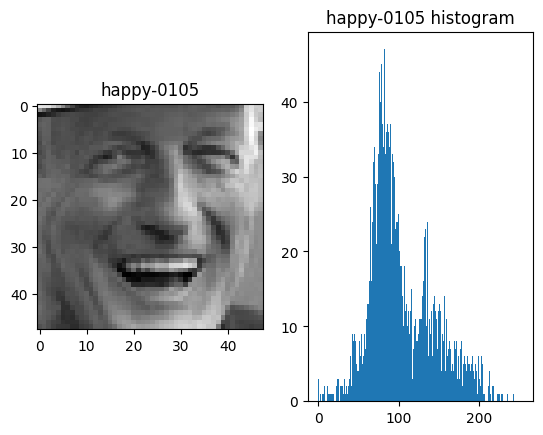

[[ 25  26  22 ...  43  37  33]
 [ 23  16  30 ...  36  28  25]
 [ 19  15  21 ...  27  23  19]
 ...
 [178 179 173 ... 137 139 138]
 [170 165 164 ... 126 126 128]
 [161 164 158 ... 123 124 126]]


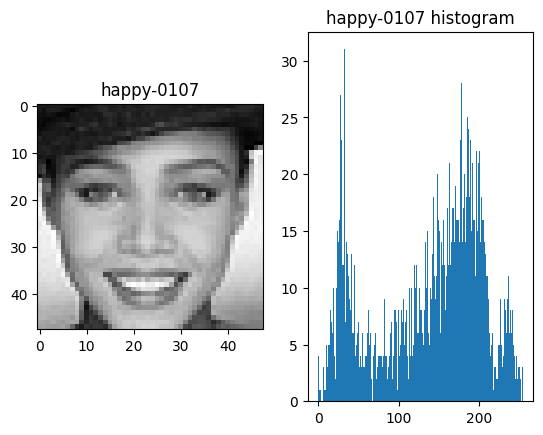

[[241 237 176 ... 225 235 234]
 [239 225 137 ... 226 235 239]
 [233 192  97 ... 209 241 236]
 ...
 [ 23  32  44 ... 205 219 213]
 [ 28  33  50 ... 204 220 224]
 [ 38  43  49 ... 215 226 232]]


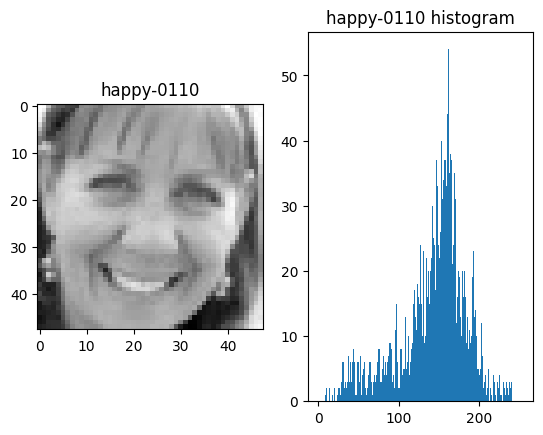

[[207 147  94 ... 248 254 254]
 [185 102  74 ... 248 255 255]
 [128  79  90 ... 240 249 254]
 ...
 [255 251 253 ... 255 254 255]
 [254 255 252 ... 255 254 255]
 [253 254 255 ... 255 253 254]]


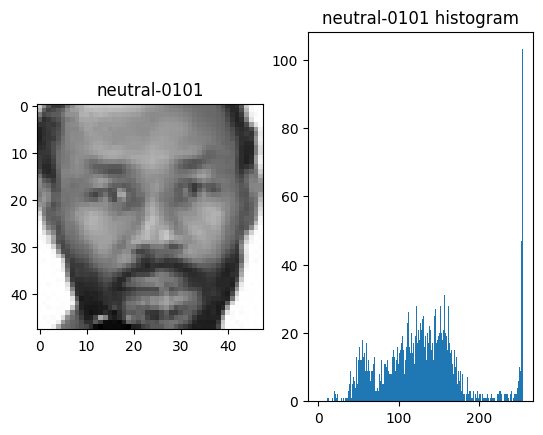

[[ 97  75  66 ... 120 131 137]
 [ 83  60  44 ... 121 132 136]
 [ 69  38  47 ... 106 131 135]
 ...
 [ 16  16  16 ...  17  17  17]
 [ 16  16  16 ...  16  17  17]
 [ 16  16  16 ...  16  16  17]]


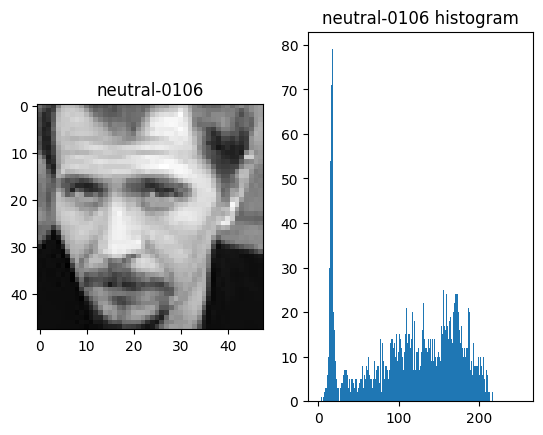

[[255 255 255 ...  29  34  42]
 [255 255 255 ...  26  32  46]
 [255 255 255 ...  27  20  30]
 ...
 [ 76  68  46 ...  95  72  87]
 [ 48  33  27 ...  96  74  85]
 [ 59  34  51 ...  95  84  93]]


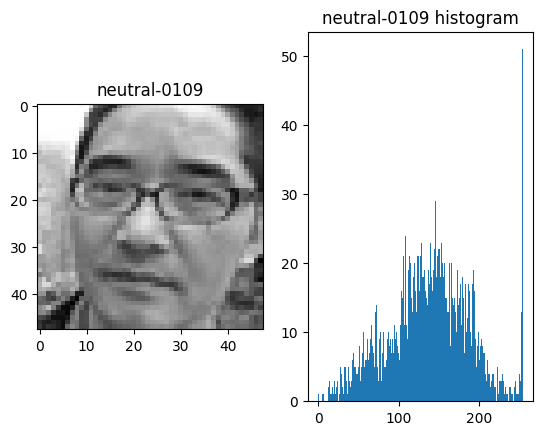

[[ 96  84  73 ... 220 205 189]
 [ 84  71  67 ... 224 227 229]
 [ 70  62  53 ... 223 226 230]
 ...
 [  4   9   7 ... 234 233 231]
 [ 11   9   2 ... 232 232 236]
 [  2  16  21 ... 231 232 235]]


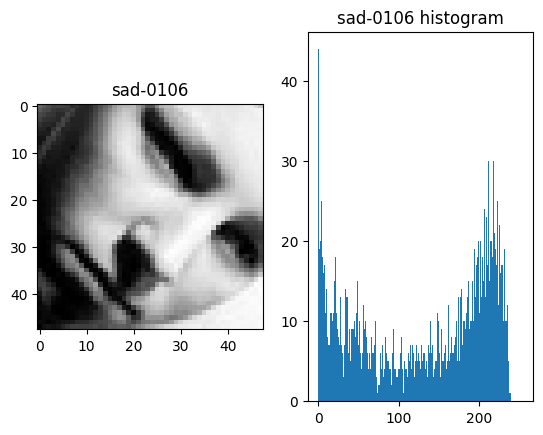

[[110 107 111 ...  65  80  82]
 [114 105 109 ...  56  81  80]
 [112 107 112 ...  58  76  83]
 ...
 [149 192 214 ...  82  65  74]
 [179 169 166 ... 114 100  74]
 [166 161 156 ... 122 142 107]]


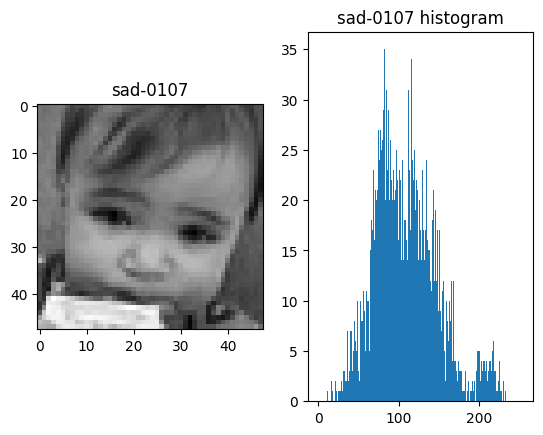

[[186 212 235 ...  20  38  54]
 [214 235 205 ...  36  20  29]
 [238 201 125 ...  71  44  22]
 ...
 [179 184 163 ...  47  64  73]
 [183 180 131 ...  50  66  79]
 [188 181 109 ...  56  74  80]]


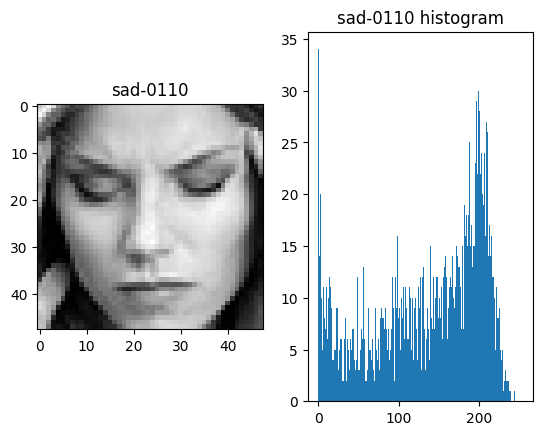

In [16]:
first_statistics = []
image_label = []
pixel_images = {
    'happy': [],
    'neutral': [],
    'sad': []
}

for emotion in ['happy', 'neutral', 'sad']:
    for e in selected[emotion]:
        image_label.append(f'{emotion}-{e}')
        image_pixel = create_pixel_matrix(emotion, e)
        pixel_images[emotion].append(image_pixel)
        print(image_pixel)
        show_histogram(f'{emotion}-{e}', image_pixel)
        first_statistics.append(first_order_statistics(image_pixel))

In [15]:
image_histogram = pd.DataFrame(first_statistics, columns=['mean', 'variance', 'skewness', 'kurtosis', 'entropy'], index=image_label)
print('First Order Statistics')
image_histogram

First Order Statistics


,mean,variance,skewness,kurtosis,entropy
happy-0105,102.976128,1664.550211,0.711753,0.234202,59.605035
happy-0107,137.716146,4503.797031,-0.456291,-1.006152,59.449653
happy-0110,143.888889,1773.740258,-0.832728,0.621634,59.645833
neutral-0101,133.392795,3082.416459,0.561167,0.055018,54.337240
neutral-0106,113.670573,3548.825940,-0.346698,-1.086451,59.845920
neutral-0109,138.642361,2684.830428,-0.014746,-0.175937,57.699653
sad-0106,127.677951,6513.115035,-0.247535,-1.490324,60.070312
sad-0107,110.358941,1643.385484,0.596771,0.268335,59.696181
sad-0110,135.783854,4707.169427,-0.552018,-0.959757,60.106771


In [7]:
def glcm_calculation(pixel_image, dist: list = [1], angles: list = [0, np.pi / 4, np.pi / 3, 3 * np.pi / 4], sym: bool = True, norm: bool = True) -> list:
    glcm = graycomatrix(pixel_image,
                        distances = dist,
                        angles = angles,
                        symmetric = sym,
                        normed = norm)
    return glcm

In [8]:
def glcm_features(glcm_matrix: list, props: list) -> list:
    features = []
    # glcm_props = [property for name in props for property in graycoprops(glcm_matrix, name)[0]]
    for name in props:
        for property in graycoprops(glcm_matrix, name):
            features.append(property)

    return np.array(features).ravel()

In [9]:
def texture_histogram(title: str, glcm_matrix: list):
    for i, angle in enumerate(['0', '45', '90', '135']):
        plt.subplot(1, 4, i + 1)
        plt.hist(glcm_matrix[:,:,0,i])
        plt.title(f'{title}_{angle}', fontsize = 10)
        plt.tight_layout()
    plt.show()

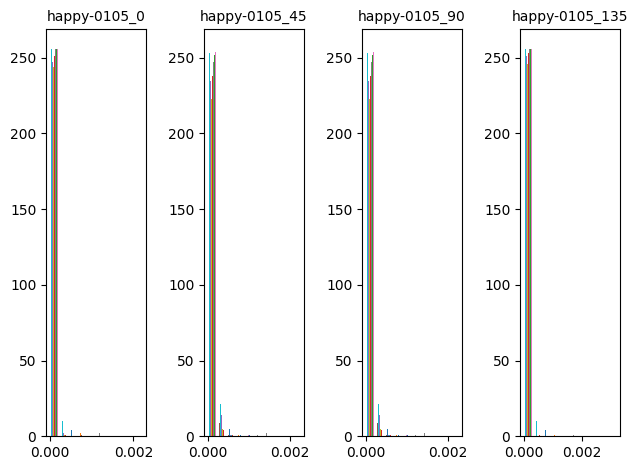

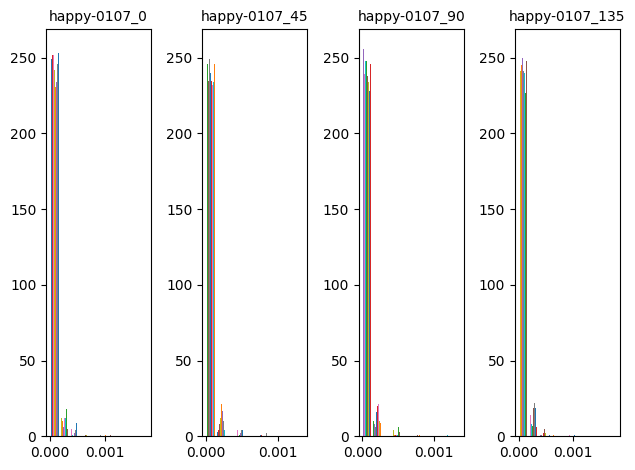

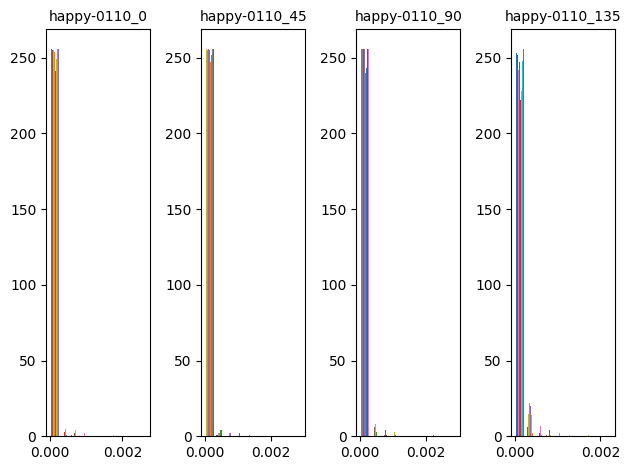

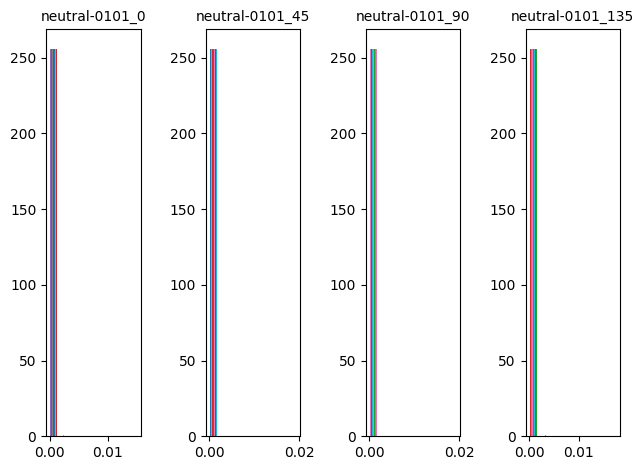

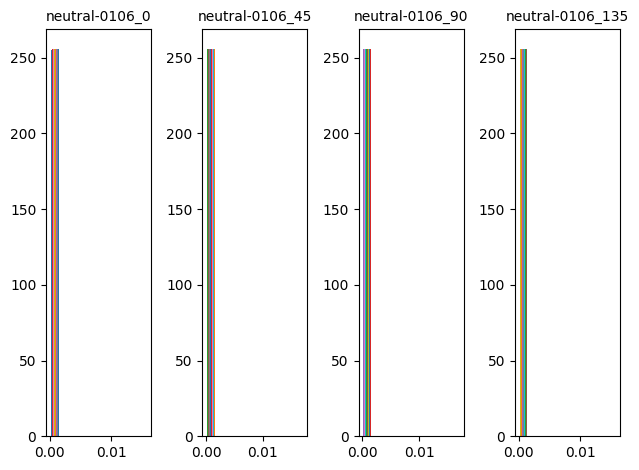

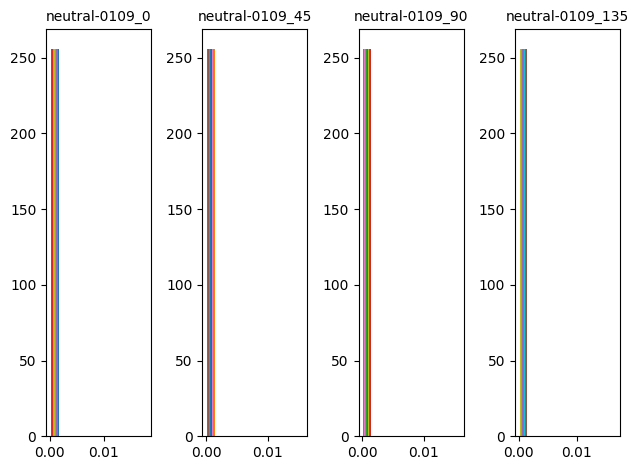

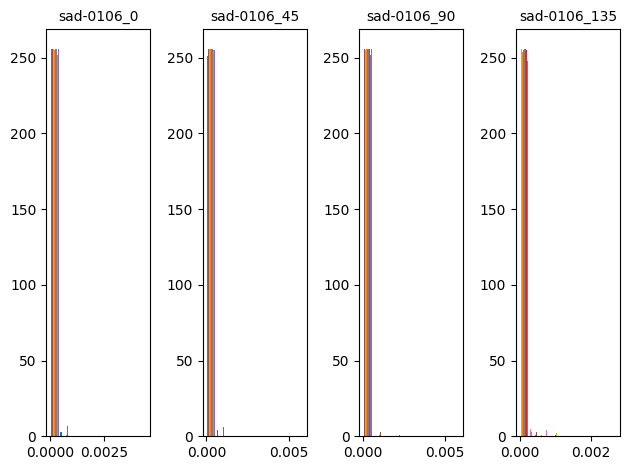

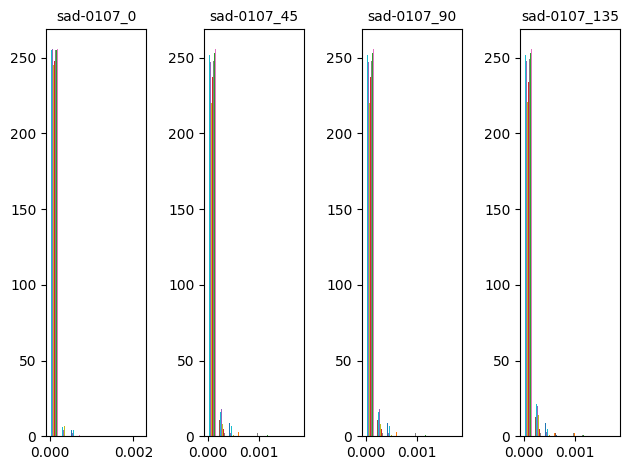

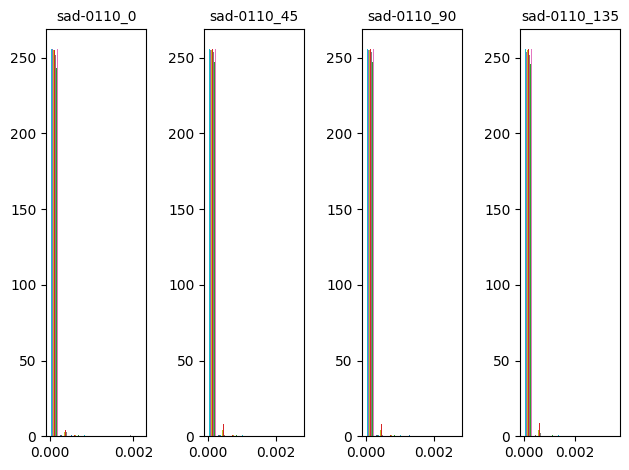

In [10]:
for emotion in ['happy', 'neutral', 'sad']:
    for i, e in enumerate(selected[emotion]):
        texture_histogram(f'{emotion}-{e}' ,glcm_calculation(pixel_images[emotion][i]))

In [11]:
properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']
features_result = []

for emotion in ['happy', 'neutral', 'sad']:
    for pi in pixel_images[emotion]:
        features_result.append(glcm_features(glcm_calculation(pi), properties))

In [12]:
angles = ['0', '45', '90', '135']
labels = []
index = []
for property in properties:
    for angle in angles:
        labels.append(f'{property}_{angle}')

for emotion in ['happy', 'neutral', 'sad']:
    for e in selected[emotion]:
        index.append(f'{emotion}-{e}')

In [13]:
second_statistics = pd.DataFrame(features_result, index = index, columns = labels)
second_statistics

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_90,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135
happy-0105,10.738918,15.094613,15.094613,15.987325,0.918852,0.815432,0.815432,0.816304,0.124583,0.101686,...,602.516976,599.168855,0.000511,0.000462,0.000462,0.000443,0.022606,0.021492,0.021492,0.021037
happy-0107,14.773493,21.445903,21.445903,21.185604,0.928139,0.873036,0.873036,0.875524,0.115618,0.067965,...,1106.276143,1084.522861,0.000390,0.000329,0.000329,0.000339,0.019736,0.018142,0.018142,0.018408
happy-0110,14.808954,18.365324,18.365324,16.468085,0.839848,0.762445,0.762445,0.810037,0.108367,0.088160,...,796.086464,636.791308,0.000504,0.000439,0.000439,0.000451,0.022447,0.020949,0.020949,0.021228
neutral-0101,13.628546,17.114531,17.114531,16.791308,0.899383,0.857009,0.857009,0.868486,0.131514,0.121602,...,822.949751,757.432322,0.000873,0.000931,0.000931,0.000895,0.029549,0.030511,0.030511,0.029914
neutral-0106,13.117021,17.520598,17.520598,18.602082,0.936860,0.900512,0.900512,0.894123,0.159905,0.136419,...,703.568583,748.765957,0.001060,0.001031,0.001031,0.000910,0.032561,0.032106,0.032106,0.030171
neutral-0109,16.312057,22.818470,22.818470,22.531010,0.862789,0.749388,0.749388,0.792644,0.113039,0.085222,...,1289.508375,1066.944771,0.000680,0.000574,0.000574,0.000600,0.026068,0.023963,0.023963,0.024485
sad-0106,15.087323,15.663649,15.663649,20.919421,0.957252,0.950620,0.950620,0.914112,0.111114,0.109594,...,637.734269,1109.492531,0.000442,0.000468,0.000468,0.000399,0.021021,0.021628,0.021628,0.019967
sad-0107,10.808511,16.012223,16.012223,14.893617,0.913068,0.813889,0.813889,0.829373,0.128675,0.088832,...,604.722046,554.711634,0.000438,0.000384,0.000384,0.000398,0.020920,0.019600,0.019600,0.019939
sad-0110,16.429965,21.412404,21.412404,20.669986,0.930668,0.878055,0.878055,0.895927,0.101236,0.085416,...,1128.287008,963.110005,0.000395,0.000364,0.000364,0.000380,0.019873,0.019086,0.019086,0.019497
